# Student Name: Pradeep Dissanayake
# Date : 2021.10.24

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [2]:
file_name = 'https://archive.ics.uci.edu/ml/machine-learning-databases/zoo/zoo.data'

# Load CSV File
data = pd.read_csv(file_name, sep=',', header=None)
data.sample(5)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
11,chicken,0,1,1,0,1,0,0,0,1,1,0,0,2,1,1,0,2
29,girl,1,0,0,1,0,0,1,1,1,1,0,0,2,0,1,1,1
70,reindeer,1,0,0,1,0,0,0,1,1,1,0,0,4,1,1,1,1
52,newt,0,0,1,0,0,1,1,1,1,1,0,0,4,1,0,0,5
74,seal,1,0,0,1,0,1,1,1,1,1,0,1,0,0,0,1,1


In [9]:
colum_headers = ['animal name','hair','feathers','eggs','milk','airborne','aquatic','predator','toothed','backbone','breathes','venomous','fins','legs','tail','domestic','catsize','animal_type']
data.columns=colum_headers
data.head()

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,animal_type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


In [10]:
# Add domain knowladge to name the animal types
replace_dict = {1: 'mammal',2: 'bird', 3: 'sname', 4: 'fish', 5: 'amphibian', 6: 'insect', 7: 'other invertebrates'}

data['animal_type_name'] = data['animal_type'].replace(replace_dict)
data.head()

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,animal_type,animal_type_name
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1,mammal
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1,mammal
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4,fish
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1,mammal
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1,mammal


In [12]:
rows = data.shape[0]
columns = data.shape[1]
print(F"rows = {rows}, columns={columns}")

rows = 101, columns=19


In [13]:
d = data['legs'].describe(include='all')
d.transpose()

count    101.000000
mean       2.841584
std        2.033385
min        0.000000
25%        2.000000
50%        4.000000
75%        4.000000
max        8.000000
Name: legs, dtype: float64

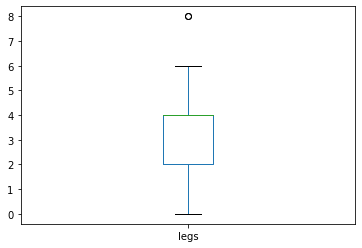

In [14]:
data['legs'].plot(kind='box')

Did you find any outliers? Yes. One outlier exists. 

In [16]:
#############################################################
# Task 5: complete the code to get an array of uniqe values in the column `animal_type' and print them.
unique_values = data['animal_type'].unique()
print(unique_values)
#############################################################

[1 4 2 7 6 5 3]


In [18]:
#############################################################
# Task 6: Type your code to find and display how many unique values in the column `animal_type'.
data['animal_type'].unique()
#############################################################

array([1, 4, 2, 7, 6, 5, 3], dtype=int64)

In [22]:
#############################################################
# Task 7: Type your code to construct and display freqeuncy table for the column 'animal_type'.

data_freq = data.groupby(by='animal_type')['animal name'].count()
print(data_freq)

#############################################################

animal_type
1    41
2    20
3     5
4    13
5     4
6     8
7    10
Name: animal name, dtype: int64


In [23]:
#############################################################
# Task 8: Display the frequncy table as a bar plot
data_freq..plot(kind='bar')
#############################################################

SyntaxError: invalid syntax (<ipython-input-23-6401b6cfa8d8>, line 3)

In [24]:
#############################################################
# Task 9: Select and display the records with `legs` greater than 4
data.query("legs > 4")
#############################################################

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,animal_type,animal_type_name
15,crayfish,0,0,1,0,0,1,1,0,0,0,0,0,6,0,0,0,7,other invertebrates
24,flea,0,0,1,0,0,0,0,0,0,1,0,0,6,0,0,0,6,insect
30,gnat,0,0,1,0,1,0,0,0,0,1,0,0,6,0,0,0,6,insect
39,honeybee,1,0,1,0,1,0,0,0,0,1,1,0,6,0,1,0,6,insect
40,housefly,1,0,1,0,1,0,0,0,0,1,0,0,6,0,0,0,6,insect
42,ladybird,0,0,1,0,1,0,1,0,0,1,0,0,6,0,0,0,6,insect
46,lobster,0,0,1,0,0,1,1,0,0,0,0,0,6,0,0,0,7,other invertebrates
51,moth,1,0,1,0,1,0,0,0,0,1,0,0,6,0,0,0,6,insect
53,octopus,0,0,1,0,0,1,1,0,0,0,0,0,8,0,0,1,7,other invertebrates
72,scorpion,0,0,0,0,0,0,1,0,0,1,1,0,8,1,0,0,7,other invertebrates


In [25]:
#############################################################
# Task 10: Complete the code below to compute corelation matrix
correlation_matrix = data.corr()

#############################################################

correlation_matrix

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,animal_type
hair,1.000000,-0.427851,-0.817382,0.878503,-0.198431,-0.473554,-0.154769,0.492531,0.191681,0.441149,-0.104245,-0.280313,0.394009,0.048973,0.207208,0.455020,-0.562384
feathers,-0.427851,1.000000,0.419248,-0.410761,0.656553,-0.058552,-0.104430,-0.613631,0.231403,0.254588,-0.145739,-0.223541,-0.206686,0.292569,0.031586,-0.135934,-0.197520
eggs,-0.817382,0.419248,1.000000,-0.938848,0.376646,0.376244,0.011605,-0.642150,-0.340420,-0.382777,0.098689,0.164796,-0.224918,-0.221090,-0.155610,-0.514650,0.661825
milk,0.878503,-0.410761,-0.938848,1.000000,-0.366765,-0.362613,-0.029721,0.628168,0.384958,0.423527,-0.242449,-0.156328,0.214196,0.210026,0.163928,0.574906,-0.723683
airborne,-0.198431,0.656553,0.376646,-0.366765,1.000000,-0.172638,-0.295181,-0.594311,-0.104718,0.286039,0.008528,-0.251157,0.043712,0.009482,0.063274,-0.349768,0.022677
aquatic,-0.473554,-0.058552,0.376244,-0.362613,-0.172638,1.000000,0.375978,0.053150,0.022463,-0.637506,0.087915,0.604492,-0.360638,-0.034642,-0.224308,-0.111866,0.326639
predator,-0.154769,-0.104430,0.011605,-0.029721,-0.295181,0.375978,1.000000,0.129452,0.051022,-0.262931,0.115391,0.190302,-0.099723,0.018947,-0.309794,0.144790,0.061179
toothed,0.492531,-0.613631,-0.642150,0.628168,-0.594311,0.053150,0.129452,1.000000,0.575085,-0.065690,-0.062344,0.364292,-0.193476,0.310368,0.069430,0.344010,-0.471527
backbone,0.191681,0.231403,-0.340420,0.384958,-0.104718,0.022463,0.051022,0.575085,1.000000,0.207666,-0.246611,0.209499,-0.432856,0.731762,0.101733,0.356976,-0.828845
breathes,0.441149,0.254588,-0.382777,0.423527,0.286039,-0.637506,-0.262931,-0.065690,0.207666,1.000000,-0.120752,-0.617219,0.369868,0.088952,0.124068,0.204125,-0.519308
